<a href="https://colab.research.google.com/github/hyeonjongChai/hjong-c/blob/main/%EA%B3%BC%EC%A0%9CW09_20150962_%EC%B1%84%ED%98%84%EC%A2%85_VER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제W09_20150962_채현종

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
import os
from ipypublish import nb_setup
from IPython.display import Image

## 1.주가데이터를 불러옵니다. 10점


In [ ]:
df = pd.read_csv('C:/Users/yssg9187/Desktop/20-2/3. 응용자료분석/D_data/s069500.csv')
df

,Date,Open,High,Low,Close,Volume,Change
0,2010-01-04,18973,19119,18973,19100,883268,0.006057
1,2010-01-05,19155,19163,19028,19081,1781284,-0.000995
2,2010-01-06,19110,19243,19103,19214,962659,0.006970
3,2010-01-07,19203,19224,18965,18976,1250996,-0.012387
4,2010-01-08,19052,19060,18810,19048,1428088,0.003794
...,...,...,...,...,...,...,...
2663,2020-10-20,31165,31520,31050,31520,9166339,0.007029
2664,2020-10-21,31575,31710,31470,31620,8601602,0.003173
2665,2020-10-22,31445,31460,31220,31405,8665206,-0.006799
2666,2020-10-23,31535,31625,31280,31520,7466985,0.003662


In [ ]:
# # 교수님은 이 부분 XXXX
# df1 = df.loc[:, ["Date", "Close"]]
# df1 = df1.reset_index()
# df1['Ret'] = (np.log(df1['Close'].astype('float32')) - np.log(df1['Close'].astype('float32').shift(1)))*100
# df1

## 2.패키지를 이용하여 다음과 같은 time series regression 모델의 결과를 보입니다.10점

In [ ]:
# trend + cycle 예측 yt=β0+β1t+β1t2+β1t3+et

In [ ]:
stock = df["Close"]

In [ ]:
T = list(range(1,len(stock)+1))

In [ ]:
df['T'] = pd.DataFrame(T, columns = ['T'])
df

,Date,Open,High,Low,Close,Volume,Change,T
0,2010-01-04,18973,19119,18973,19100,883268,0.006057,1
1,2010-01-05,19155,19163,19028,19081,1781284,-0.000995,2
2,2010-01-06,19110,19243,19103,19214,962659,0.006970,3
3,2010-01-07,19203,19224,18965,18976,1250996,-0.012387,4
4,2010-01-08,19052,19060,18810,19048,1428088,0.003794,5
...,...,...,...,...,...,...,...,...
2663,2020-10-20,31165,31520,31050,31520,9166339,0.007029,2664
2664,2020-10-21,31575,31710,31470,31620,8601602,0.003173,2665
2665,2020-10-22,31445,31460,31220,31405,8665206,-0.006799,2666
2666,2020-10-23,31535,31625,31280,31520,7466985,0.003662,2667


In [ ]:
df['T2'] = df['T']*df['T']

In [ ]:
df['T3'] = df['T']*df['T']*df['T']

In [ ]:
stock = ols("Close ~ T + T2 + T3", data=df).fit()

In [ ]:
print(stock.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1445.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:07:33   Log-Likelihood:                -24102.
No. Observations:                2668   AIC:                         4.821e+04
Df Residuals:                    2664   BIC:                         4.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.072e+04    157.415    131.639      0.0

## 3. Autocorrelation이 있는지 Durbin-Watson 검정을 실시하여 autocorrelation 여부를 판단합니다.

### 3.1. 모델의 Durbin-Watson값을 보입니다. 10점

Durbin-Watson:                   0.016

### 3.2. Durbin-Watson test를 실시하기 위해 필요한 검정표에서 n=200인 dL과 dU를 사용합니다. 10점


k=3 (T1,T2,T3) & n=200, 
dL = 1.74, dU = 1.8 

### 3.3. Autocorrelation 여부를 검정합니다. 10점

d < dL 이므로, 기무가설을 기각한다.(positivly autocorrelated)

## 4.2020.10.27일 예측주가를 제시합니다. 10점


In [ ]:
beta = stock.params
beta

Intercept    2.072185e+04
T            9.668019e-01
T2           1.298405e-03
T3          -1.716293e-07
dtype: float64

In [ ]:
p2669 = beta[0] + beta[1] * 2669 + beta[2] * 2669*2669 + beta[3] * 2669*2669*2669 

In [ ]:
p2669

29288.364114030595

In [ ]:
X = df[['T' ,'T2', 'T3']]

In [ ]:
ypred = stock.predict(X)
print(ypred)

0       20722.819070
1       20723.789765
2       20724.763056
3       20725.738940
4       20726.717418
            ...     
2663    29267.212967
2664    29271.443494
2665    29275.673873
2666    29279.904103
2667    29284.134184
Length: 2668, dtype: float64


In [ ]:
yactual = df['Close']
yactual

0       19100
1       19081
2       19214
3       18976
4       19048
        ...  
2663    31520
2664    31620
2665    31405
2666    31520
2667    31460
Name: Close, Length: 2668, dtype: int64

In [ ]:
df['yred'] = ypred
df

,Date,Open,High,Low,Close,Volume,Change,T,T2,T3,yred
0,2010-01-04,18973,19119,18973,19100,883268,0.006057,1,1,1,20722.819070
1,2010-01-05,19155,19163,19028,19081,1781284,-0.000995,2,4,8,20723.789765
2,2010-01-06,19110,19243,19103,19214,962659,0.006970,3,9,27,20724.763056
3,2010-01-07,19203,19224,18965,18976,1250996,-0.012387,4,16,64,20725.738940
4,2010-01-08,19052,19060,18810,19048,1428088,0.003794,5,25,125,20726.717418
...,...,...,...,...,...,...,...,...,...,...,...
2663,2020-10-20,31165,31520,31050,31520,9166339,0.007029,2664,7096896,18906130944,29267.212967
2664,2020-10-21,31575,31710,31470,31620,8601602,0.003173,2665,7102225,18927429625,29271.443494
2665,2020-10-22,31445,31460,31220,31405,8665206,-0.006799,2666,7107556,18948744296,29275.673873
2666,2020-10-23,31535,31625,31280,31520,7466985,0.003662,2667,7112889,18970074963,29279.904103


위 모델에서 2020.10.27 주가는 약 29284로 예측된다.

## 5.2020.10.27일 예측주가의 95% ,predected error 구간을 구합니다.10점


In [ ]:
sig = np.sqrt(stock.mse_resid)
sig

2029.8671285111882

In [ ]:
df['constant'] = 1

In [ ]:
x_p = [1, 2669, 2669*2669, 2669*2669*2669]

In [ ]:
x = df[['constant', 'T', 'T2', 'T3']]

In [ ]:
XtX = np.dot(x.T, x) # Xt : 전치행렬 / np.dot : 행렬의 곱

In [ ]:
XtX_inv  = np.linalg.inv(XtX) # 역행렬

In [ ]:
se = ( np.dot(x_p, np.dot(XtX_inv, x_p)) + 1) * sig

In [ ]:
se

2032.512886834565

In [ ]:
p2669

29288.364114030595

In [ ]:
lowerBound = p2669 - 2*se
lowerBound

25223.338340361464

In [ ]:
upperBound = p2669  + 2*se
upperBound

33353.38988769973

예측주가의 95%의 범위는 lowerbound ~ upperbound
약 25223 ~ 33353

## 6. 실제치와 모델에 의한 추정치를 그래프로 보입니다. .10점

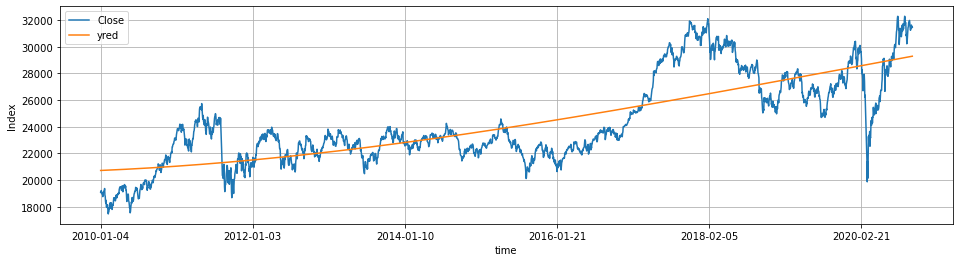

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(16, 4), sharex=True)
df.plot(x = 'Date', y='Close', ax=ax, grid=True)
df.plot(x = 'Date', y='yred',  ax=ax, grid=True)
ax.set(xlabel="time", ylabel="Index");
plt.show()